In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/New Zeolite/Final-A.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(1751, 17)

In [3]:
A=df['Ge/Si']
B=df["Al/T"]
C = df['OH/T']
D = df['H2O/T']
E = df["F/T"]
F=df['SDA/T']
G=df["B/T"]
H = df['Na2O/T']
I = df['Cl/T']
J=df['Temperature']
K=df["time"]
L = df['AR']
M=df['Area']
N= df['C/N']
O= df['rpm']
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape

(1751, 15)

In [4]:
X_OS=List1
Y_OS=df["RC2"]


train accuracy 0.9984770364998792
test accuracy 0.9286103896103898
train precision 0.9970720244964898
test precision 0.9062381462337941
train recall 0.998724918571944
test recall 0.8957440698579358
train f1 0.9978945584287381
test f1 0.8997463166678623
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1204
           1       0.99      1.00      1.00       372

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576

test               precision    recall  f1-score   support

           0       0.96      0.95      0.96       133
           1       0.86      0.88      0.87        42

    accuracy                           0.94       175
   macro avg       0.91      0.92      0.91       175
weighted avg       0.94      0.94      0.94       175

Matthews correlation coefficient 0.9957952508054471


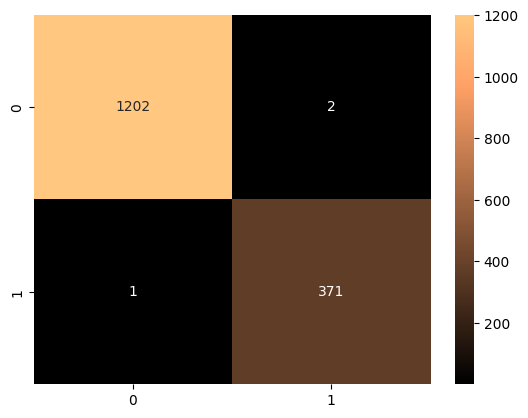

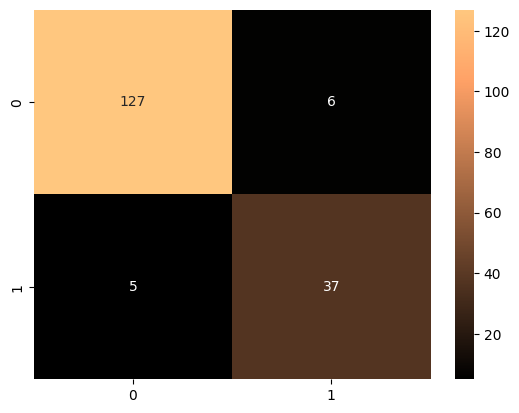

In [5]:
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_RF=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1)
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmc_RF.append(mmc)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient',mean(mmc_RF))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9984770364998792
test accuracy 0.9383149350649351
train precision 0.9970738551751692
test precision 0.9163527943914886
train recall 0.9987241633618236
test recall 0.9136518945707918
train f1 0.9978947140056416
test f1 0.9140384193572368
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1204
           1       0.99      1.00      1.00       372

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576

test               precision    recall  f1-score   support

           0       0.95      0.95      0.95       133
           1       0.85      0.83      0.84        42

    accuracy                           0.93       175
   macro avg       0.90      0.89      0.90       175
weighted avg       0.93      0.93      0.93       175

Matthews correlation coefficient 0.9957961636816413


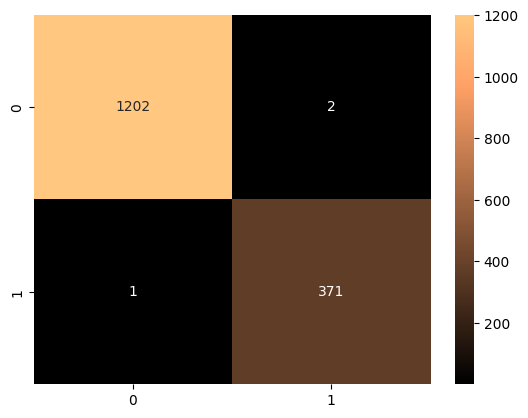

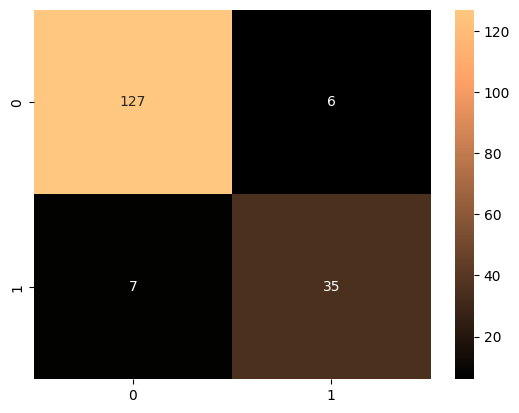

In [6]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gb=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1, n_estimators=930, learning_rate=0.2, 
                                max_depth=3)                          
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_gb.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient',mean(mmc_gb))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



train accuracy 0.9729043187494965
test accuracy 0.9097824675324675
train precision 0.963721421243641
test precision 0.8803950259368218
train recall 0.9610428024868349
test recall 0.867671659125973
train f1 0.9623693656379133
test f1 0.8729772306674146
train               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1204
           1       0.94      0.93      0.94       372

    accuracy                           0.97      1576
   macro avg       0.96      0.96      0.96      1576
weighted avg       0.97      0.97      0.97      1576

test               precision    recall  f1-score   support

           0       0.94      0.98      0.96       133
           1       0.94      0.81      0.87        42

    accuracy                           0.94       175
   macro avg       0.94      0.90      0.92       175
weighted avg       0.94      0.94      0.94       175

Matthews correlation coefficient 0.9247587554732963


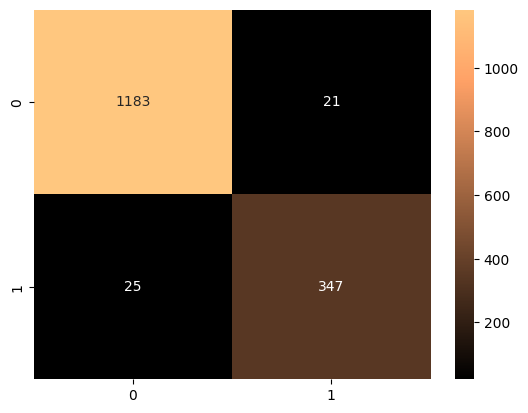

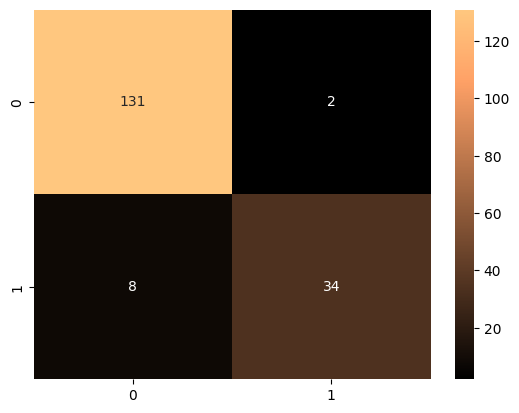

In [7]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgb=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB=XGBClassifier(random_state=1, n_estimators=1600, learning_rate=1,
                   alpha=0.095, max_depth=2,colsample_bytree=0.1, reg_lambda=1, min_child_weight=3) 
    xgb_model=XGB.fit(X_Train, Y_Train)
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_xgb.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient',mean(mmc_xgb))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9984770364998792
test accuracy 0.9263311688311688
train precision 0.9990049746680064
test precision 0.9027477254179566
train recall 0.9967788780304996
test recall 0.8933526937109793
train f1 0.9978855889048024
test f1 0.8965931388962767
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1204
           1       1.00      0.99      1.00       372

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576

test               precision    recall  f1-score   support

           0       0.96      0.96      0.96       133
           1       0.88      0.88      0.88        42

    accuracy                           0.94       175
   macro avg       0.92      0.92      0.92       175
weighted avg       0.94      0.94      0.94       175

Matthews correlation coefficient 0.9957810850676815


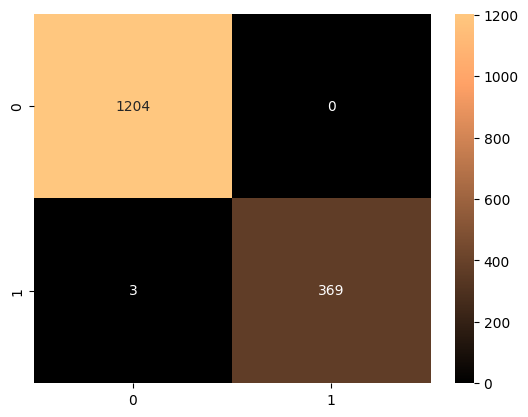

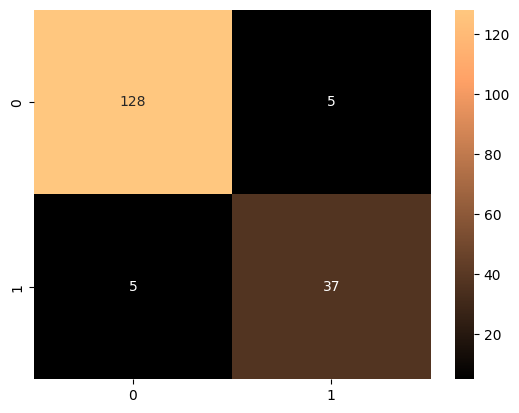

In [8]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_et=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1)
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_et.append(mmc)
   
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient',mean(mmc_et))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()

train accuracy 0.9984770364998792
test accuracy 0.9211753246753247
train precision 0.9990049746680064
test precision 0.8926848547689612
train recall 0.9967788780304996
test recall 0.8908558710208357
train f1 0.9978855889048024
test f1 0.8906966992888284
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1204
           1       1.00      0.99      1.00       372

    accuracy                           1.00      1576
   macro avg       1.00      1.00      1.00      1576
weighted avg       1.00      1.00      1.00      1576

test               precision    recall  f1-score   support

           0       0.97      0.95      0.96       133
           1       0.86      0.90      0.88        42

    accuracy                           0.94       175
   macro avg       0.92      0.93      0.92       175
weighted avg       0.94      0.94      0.94       175

Matthews correlation coefficient 0.9957810850676815


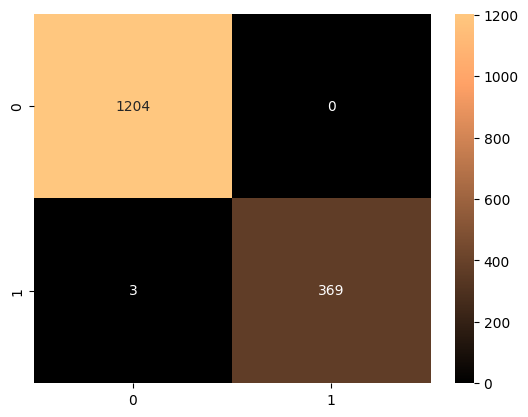

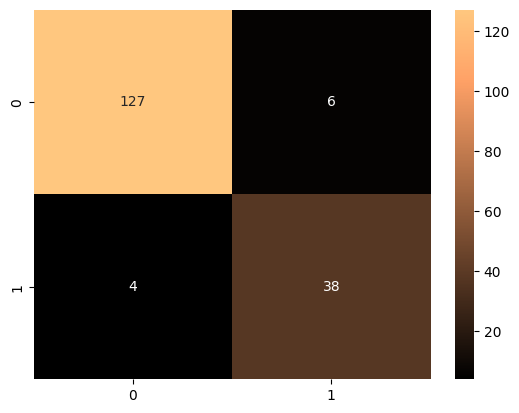

In [9]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dt=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1)
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dt.append(mmc)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient',mean(mmc_dt))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_r

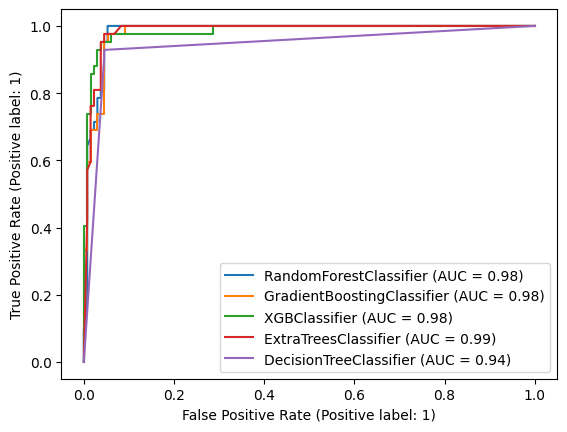

In [11]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_roc_curve(RF,X_Test,Y_Test)
ax=plt.gca()
gb_disp=plot_roc_curve(GB,X_Test,Y_Test, ax=ax)
xgb_disp=plot_roc_curve(XGB,X_Test,Y_Test, ax=ax)
et_disp=plot_roc_curve(ET,X_Test,Y_Test, ax=ax)
dt_disp=plot_roc_curve(DT,X_Test,Y_Test, ax=ax)
plt.show()


C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ganes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

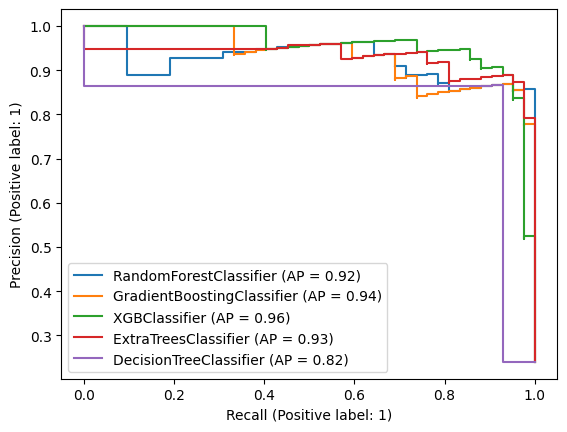

In [12]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_precision_recall_curve(RF,X_Test,Y_Test)
ax=plt.gca()
gb_disp=plot_precision_recall_curve(GB, X_Test,Y_Test, ax=ax)
xgb_disp=plot_precision_recall_curve(XGB, X_Test,Y_Test, ax=ax)
et_disp=plot_precision_recall_curve(ET, X_Test,Y_Test, ax=ax)
dt_disp=plot_precision_recall_curve(DT, X_Test,Y_Test, ax=ax)
plt.show()